In [1]:
# !pip install neuron
# !pip install netpyne
import matplotlib

In [2]:
# rm -r netpyne-course-2021

In [3]:
# !git clone https://github.com/suny-downstate-medical-center/netpyne-course-2021.git
# !cd netpyne-course-2021

In [4]:
!nrnivmodl .

/home/fernando/Dropbox/Biestabilidade-HH/BistabilityHH/izhi
Mod files: "./izhi2003a.mod" "./izhi2003b.mod"

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./izhi2003a.o ./izhi2003b.o  -L/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special



Start time:  2021-08-09 16:29:27.494752

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 5 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 13 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 5 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation for 200.0 ms...
  Done; run time = 0.09 s; real-time ratio: 2.18.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 5
  Connections: 18 (3.60 per cell)
  Spikes: 55 (55.00 Hz)
  Simulated time: 0.2 s; 1 workers
  Run time: 0.09 s
  Done; saving time = 0.01 s.
Plotting raster...


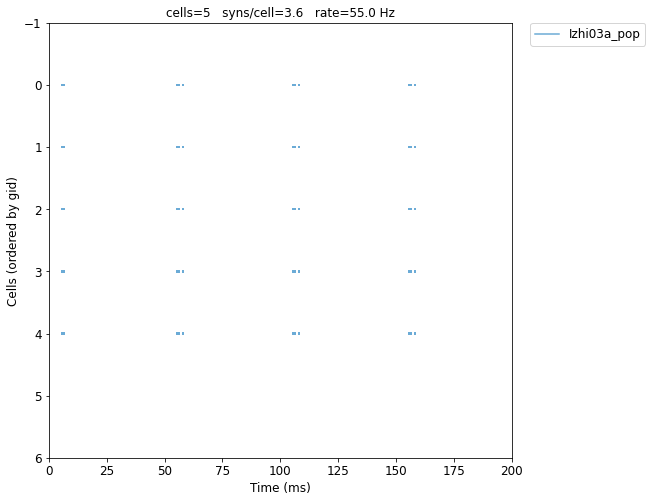

  Done; plotting time = 0.21 s

Total time = 0.31 s

End time:  2021-08-09 16:29:27.807909


In [11]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['Izhi03a_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Izh2003a'}

### Izhi2003a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi03a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003a'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',
    cellArgs={'type':'tonic spiking', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi03a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2003a_0']['vref'] = 'V' # specify that uses its own voltage V

## Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 2.0, 'e': 0}  # soma synapse


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.0}
netParams.stimTargetParams['bg1'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Izh2003a']}, 'weight': 5, 'delay': 5, 'sec': 'soma'}


## Connectivity params
netParams.connParams['recurrent'] = {
    'preConds': {'cellType': 'PYR'}, 
    'postConds': {'cellType': 'PYR'},  #  PYR -> PYR random
    'connFunc': 'convConn',           # connectivity function (random)
    'convergence': 'uniform(0,10)',   # max number of incoming conns to cell
    'weight': 0.001,                  # synaptic weight
    'delay': 5,                       # transmission delay (ms)
    'sec': 'soma'}                    # section to connect to

# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 2*1e2          # Duration of the simulation, in ms
simConfig.dt = 0.005                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
simConfig.recordStep = 0.005        # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}           
# simConfig.analysis['plotTraces'] = {'include': ['Izhi03a_pop']}            


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


In [ ]:
# !rm -r x86_64

In [ ]:
sim.net.cells[0].tags

In [10]:
cellRule['secs']['soma']['pointps']['Izhi2003a_0']['vref']

'V'

In [9]:
netParams.cellParams['PYR_Izhi03a_rule']['secs']['soma']['pointps']['Izhi2003a_0']['vref']

'V'